In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
print(tf.constant([[1,2,3],[4,5,6]])) # matrix
tf.constant(10) # scalar

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [3]:
t = tf.constant([[1,2,3],[4,5,6]])
t.shape, t.dtype

(TensorShape([2, 3]), tf.int32)

In [4]:
t[:,:1] # indexing same as numpy
t[..., 1, tf.newaxis] # there is also a np.newaxis 

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]])>

## operations

In [5]:
t+10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]])>

In [6]:
tf.square(t), t @ tf.transpose(t)
# @ is here for matrix multiplication, you can also use tf.matmul()
# page->499 for more.

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 1,  4,  9],
        [16, 25, 36]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[14, 32],
        [32, 77]])>)

In [7]:
# The Keras API has its own low-level API, located in keras.backend.
# It includes functions like square(), exp(), and sqrt(). In tf.keras,
# these functions generally just call the corresponding TensorFlow
# operations. If you want to write code that will be portable to other
# Keras implementations, you should use these Keras functions.
# However, they only cover a subset of all functions available in
# TensorFlow, so in this book we will use the TensorFlow operations
# directly. Here is as simple example using keras.backend, which is
# commonly named K for short:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 26],
       [14, 35],
       [19, 46]])>

In [8]:
# you can create a tensor from a NumPy
# array, and vice versa.

a = np.array([1,2,3])
t = tf.constant(a)
# t.numpy() or np.array(t) to convert to numpy

In [10]:
## warning

# Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit.
# This is because 32-bit precision is generally more than enough for neural networks,
# plus it runs faster and uses less RAM. So when you create a tensor from a NumPy
# array, make sure to set dtype=tf.float32.

## Type conversions

In [11]:
# Type conversions can significantly hurt performance, and they can easily
# go unnoticed when they are done automatically. To avoid this, TensorFlow
# does not perform any type conversions automatically: it just raises an
# exception if you try to execute an operation on tensors with incompatible
# types. For example, you cannot add a float tensor and an integer tensor,
# and you cannot even add a 32-bit float and a 64-bit float:

In [12]:
# tf.constant(2.) + tf.constant(40) error

# This may be a bit annoying at first, but remember that it’s for a good
# cause! And of course you can use tf.cast() when you really need to
# convert types:

In [13]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)
# we have to cast it to float32 cause it is by default 32 for less Ram usage and faster.. yk.

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## Variables

In [14]:
# as constant cannot be modified we need variables as we need to change weights in backprop..
v = tf.Variable([[1,2,3],[4,5,6]])

# it can also be modified in place using the assign()
# method (or assign_add() or assign_sub(), which increment or
# decrement the variable by the given value). You can also modify
# individual cells (or slices), by using the cell’s (or slice’s) assign()
# method (direct item assignment will not work) or by using the
# scatter_update() or scatter_nd_update() methods:

v.assign(2 * v)
v[0, 1].assign(42)
v.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100,200])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[100,  42,   6],
       [  8,  10, 200]])>

In [15]:
# other data structures
# page->503

## Customizing Models and Training Algorithms

In [17]:
# Custom Loss Function

# Just create a function that
# takes the labels and predictions as arguments, and use TensorFlow
# operations to compute every instance’s loss:

# Huber loss 
# this is also avaliable in keras.losses.Huber class
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# It is also preferable to return a tensor containing one loss per instance,
# rather than returning the mean loss. This way, Keras can apply class
# weights or sample weights when requested

In [20]:
# then compile it using the loss function
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

# more pratical implementation

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [22]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

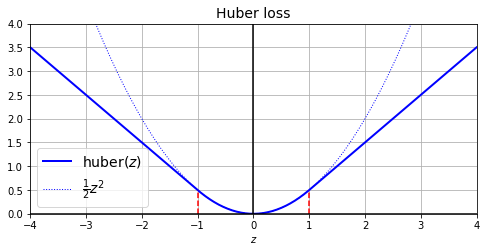

In [23]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [24]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [25]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [26]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6391 - mae: 0.9920 - val_loss: 0.2114 - val_mae: 0.5018
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2060 - mae: 0.4958 - val_loss: 0.2201 - val_mae: 0.5023


## Saving/Loading Models with Custom Objects

In [27]:
model.save("my_model_with_a_custom_loss.h5")

In [28]:
# Saving a model containing a custom loss function works fine, as Keras
# saves the name of the function. Whenever you load it, you’ll need to
# provide a dictionary that maps the function name to the actual function.
# More generally, when you load a model containing custom objects, you
# need to map the names to the objects:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
custom_objects={"huber_fn": huber_fn})

In [29]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1964 - mae: 0.4823 - val_loss: 0.2001 - val_mae: 0.4793
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1922 - mae: 0.4761 - val_loss: 0.1845 - val_mae: 0.4645


In [30]:
# With the current implementation, any error between –1 and 1 is considered
# “small.” But what if you want a different threshold? One solution is to
# create a function that creates a configured loss function:


def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [31]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [32]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2142 - mae: 0.4763 - val_loss: 0.2273 - val_mae: 0.4715
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2103 - mae: 0.4722 - val_loss: 0.2260 - val_mae: 0.4772


In [33]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [34]:
# Unfortunately, when you save the model, the threshold will not be saved.
# This means that you will have to specify the threshold value when
# loading the model (note that the name to use is "huber_fn", which is the
# name of the function you gave Keras, not the name of the function that
# created it):
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
custom_objects={"huber_fn": create_huber(2.0)})

In [35]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2061 - mae: 0.4680 - val_loss: 0.2079 - val_mae: 0.4679
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2056 - mae: 0.4668 - val_loss: 0.2040 - val_mae: 0.4573


In [36]:
# You can solve this by creating a subclass of the keras.losses.Loss class,
# and then implementing its get_config() method:

class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [38]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [39]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7999 - mae: 0.9673 - val_loss: 0.4065 - val_mae: 0.6106
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2570 - mae: 0.5304 - val_loss: 0.2830 - val_mae: 0.5250


In [41]:
model.save("my_model_with_a_custom_loss_class.h5")

In [42]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [43]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2360 - mae: 0.5069 - val_loss: 0.2125 - val_mae: 0.4805
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2252 - mae: 0.4961 - val_loss: 0.2570 - val_mae: 0.4961


In [44]:
model.loss.threshold

2.0

## Other Custom Functions

In [45]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [47]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [50]:
# The activation function will be applied to the output of this Dense layer,
# and its result will be passed on to the next layer. The layer’s weights will
# be initialized using the value returned by the initializer. At each training
# step the weights will be passed to the regularization function to compute
# the regularization loss, which will be added to the main loss to get the
# final loss used for training. Finally, the constraint function will be called
# after each training step, and the layer’s weights will be replaced by the
# constrained weights.

In [51]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [52]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [53]:
# If a function has hyperparameters that need to be saved along with the
# model, then you will want to subclass the appropriate class, such as
# keras.regularizers.Regularizer, keras.constraints.Constraint,
# keras.initializers.Initializer, or keras.layers.Layer (for any
# layer, including activation functions). Much like we did for the custom
# loss, here is a simple class for ℓ regularization that saves its factor
# hyperparameter (this time we do not need to call the parent constructor or
# the get_config() method, as they are not defined by the parent class):
# class MyL1Regularizer(keras.regularizers.Regularizer):
# def __init__(self, factor):
# self.factor = factor
# def __call__(self, weights):
# return tf.reduce_sum(tf.abs(self.factor * weights))
# def get_config(self):
# return {"factor": self.factor}

## Custom metrics

In [54]:
# model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])
# create_huber() created earlier

In [55]:
# For each batch during training, Keras will compute this metric and keep
# track of its mean since the beginning of the epoch. Most of the time, this is
# exactly what you want. But not always! Consider a binary classifier’s
# precision, for example. As we saw in Chapter 3, precision is the number of
# true positives divided by the number of positive predictions (including
# both true positives and false positives). Suppose the model made five
# positive predictions in the first batch, four of which were correct: that’s
# 80% precision. Then suppose the model made three positive predictions in
# the second batch, but they were all incorrect: that’s 0% precision for the
# second batch. If you just compute the mean of these two precisions, you
# get 40%. But wait a second—that’s not the model’s precision over these
# two batches! Indeed, there were a total of four true positives (4 + 0) out of
# eight positive predictions (5 + 3), so the overall precision is 50%, not
# 40%. What we need is an object that can keep track of the number of true
# positives and the number of false positives and that can compute their
# ratio when requested. This is precisely what the
# keras.metrics.Precision class does:

explanation of what's going on :
the thing is we could have used create_huber as a metric like we do during model.compile(....metrics=[create_huber(2.0]), but this would not have worked that well cause read upper part, so what to do then. ig we have to create a streaming metric read below. so we could transform or create a HuberMetrix see 
below...

In [57]:
precision = keras.metrics.Precision()
print(precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]))
print(precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]))
# In this example, we created a Precision object, then we used it like a
# function, passing it the labels and predictions for the first batch, then for
# the second batch (note that we could also have passed sample weights). We
# used the same number of true and false positives as in the example we just
# discussed. After the first batch, it returns a precision of 80%; then after the
# second batch, it returns 50% (which is the overall precision so far, not the
# second batch’s precision). This is called a streaming metric (or stateful metric),
# as it is gradually updated, batch after batch.

tf.Tensor(0.8, shape=(), dtype=float32)
tf.Tensor(0.5, shape=(), dtype=float32)


In [58]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    
    
# Now we can use this as a metric
# explanation of the code on page->513

## Custom Layers

In [63]:
# First, some layers have no weights, such as keras.layers.Flatten or
# keras.layers.ReLU. If you want to create a custom layer without any
# weights, the simplest option is to write a function and wrap it in a
# keras.layers.Lambda layer. For example, the following layer will apply
# the exponential function to its inputs:

exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [64]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 3.3857 - val_loss: 1.4127
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.1850 - val_loss: 0.8511
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7869 - val_loss: 0.5743
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5694 - val_loss: 0.4387
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4337


0.43366917967796326

In [85]:
# This custom layer can then be used like any other layer, using the
# Sequential API, the Functional API, or the Subclassing API. You can also
# use it as an activation function (or you could use activation=tf.exp,
# activation=keras.activations.exponential, or simply
# activation="exponential"). The exponential layer is sometimes used in
# the output layer of a regression model when the values to predict have
# very different scales (e.g., 0.001, 10., 1,000.).

In [68]:
# As you’ve probably guessed by now, to build a custom stateful layer (i.e., a
# layer with weights), you need to create a subclass of the
# keras.layers.Layer class. For example, the following class implements
# a simplified version of the Dense layer:

class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        # kernel here is just weights matrix
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

# explanation of the code page->515

In [69]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [70]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5474


0.5473727583885193

In [71]:
model.save("my_model_with_a_custom_layer.h5")

In [72]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [74]:
# To create a layer with multiple inputs(i.e., Concatenate)
# For example, the following toy layer takes two inputs and
# returns three outputs:

class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]
    
# This layer may now be used like any other layer, but of course only using
# the Functional and Subclassing APIs, not the Sequential API (which only
# accepts layers with one input and one output).

Our custom layer can be called using the functional API like this:

In [75]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


Note that the `call()` method receives symbolic inputs, whose shape is only partially specified (at this stage, we don't know the batch size, which is why the first dimension is `None`):

We can also pass actual data to the custom layer. To test this, let's split each dataset's inputs into two parts, with four features each:

In [76]:
# If your layer needs to have a different behavior during training and during
# testing (e.g., if it uses Dropout or BatchNormalization layers), then you
# must add a training argument to the call() method and use this
# argument to decide what to do. For example, let’s create a layer that adds
# Gaussian noise during training (for regularization) but does nothing during
# testing (Keras has a layer that does the same thing,
# keras.layers.GaussianNoise):

class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

## Custom Models

In [ ]:
# We want to create a model page->519

In [77]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

This layer is a bit special since it contains other layers. This is handled
transparently by Keras: it automatically detects that the hidden attribute
contains trackable objects (layers in this case), so their variables are
automatically added to this layer’s list of variables. The rest of this class is
self-explanatory. Next, let’s use the Subclassing API to define the model
itself:

In [78]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

We create the layers in the constructor and use them in the call()
method. This model can then be used like any other model (compile it, fit
it, evaluate it, and use it to make predictions). If you also want to be able
to save the model using the save() method and load it using the
keras.models.load_model() function, you must implement the
get_config() method (as we did earlier) in both the ResidualBlock
class and the ResidualRegressor class. Alternatively, you can save and
load the weights using the save_weights() and load_weights()
methods.

In [80]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

In [81]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [82]:
# skipped everything in between 
# this is too complex and advance for now.. 

# TensorFlow Function and Graphs

In [83]:
def cube(x):
    return x ** 3

In [85]:
cube(2), cube(tf.constant(2.0))

(8, <tf.Tensor: shape=(), dtype=float32, numpy=8.0>)

In [86]:
tf_cube = tf.function(cube)

In [88]:
tf_cube

In [90]:
# Under the hood, tf.function() analyzed the computations performed by
# the cube() function and generated an equivalent computation graph! As
# you can see, it was rather painless (we will see how this works shortly).
# Alternatively, we could have used tf.function as a decorator; this is
# actually more common:

@tf.function
def tf_cube(x):
    return x ** 3

In [93]:
# The original Python function is still available via the TF Function’s
# python_function attribute, in case you ever need it:

tf_cube.python_function(2), tf_cube(2)

(8, <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [94]:
# skipped too complex ig... shift to pytorch as soon as possible ig..